## Homework 1 - Supervised Learning

## Problem 1: Set up Github and clone assignment repo. 

**REMINDER ON HOW TO SUBMIT:**


- Go to http://www.github.com and create an account.
- Fill out this spreadsheet with your Github username and Columbia UNI https://docs.google.com/spreadsheets/d/1KEBDe8H0x_drnqx4ZeMyMUN-6-LrDVy2tBBJ97RZtMY/edit?usp=sharing

- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. **Make sure to install command line tools. **
- Click on this link: https://classroom.github.com/a/Xk990Gdv
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/apmae4990-hw-project-{your-git-username}```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!). **This is where you will store all of your homework and your final project. **


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ cd apmae4990-hw-project-{your-git-username} ```

``` $ git add myhomeworksolutions.ipynb ``` ( this adds your homework to the files to be pushed )

``` $ git status ``` ( this shows which files have been modified and will be part of the commit)

``` $ git commit -m "added my homework 1 solutions" ``` (commits the files for the push to the repo)

``` $ git push origin master $ ``` (pushes the files to the repo)

**Writing to the notebook:** To write code in this notebook, you can create a new cell directly below the problem. Either click `Insert -> Insert Cell Below` or type `CTRL-M` **then** `B`.


### Very important!!

Do not expect to understand every single import statement or piece of code when you first start. You should always think about what your goal is, and try to figure out how to do it yourself. However in many cases it is much easier to simply search stack overflow for the *right* way to do something. You are free to do this and do not need to include any references. This is largely how engineers and data scientists discover things in practice when they are unfamiliar with a topic. 


## Problem 2: Sales Data Analysis

In this problem we will explore our first dataset using `pandas` (for loading and procssing our data) and `sklearn` (for building machine learning models).

In [132]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import pylab as plt
import seaborn
import numpy.random as nprnd
import random


%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features (variables, covariates, all mean the same thing)?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper
- **Sales:** Number of 1k units sold. 

**Goal:** Predict the amount of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the variable ranges.

**[5 points]** Use df.boxplot()

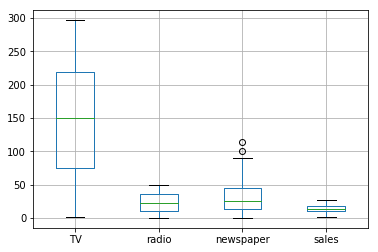

In [4]:
df.boxplot()


### Problem 2, Part 1: Create scatter plots using `pandas.plotting.scatter_matrix`

**[5 points]** Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. 

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


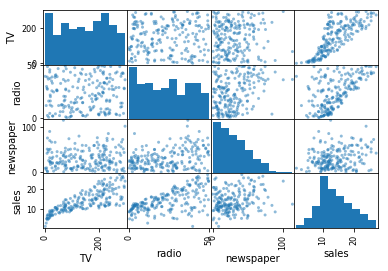

In [19]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df);

Which of the variables seem correlated with one another? Which don't? Explain your answer. 

Why might these variables be correlated in intuitive terms?

**Answer:**
Sales with TV and radio because I assume that advertising in those avenues generated new sales. 

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

**Note:** This example does not randomize the test/train split. So please ensure you've done this using `test_train_split`. 

In [300]:
from sklearn.linear_model import LinearRegression

**[2 points]** a) Set y to be the sales in df

In [134]:
Y = df.sales
Y.head()


1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

**[2 points]** b) Set X to be just the features described above in df. Because we need to add an intercept in, also create a new column called `interecept` which is just 1. 

In [135]:
X=df.loc[:,"TV":"newspaper"]
X['intercept']=1.0
X.head()

,TV,radio,newspaper,intercept
1,230.1,37.8,69.2,1.0
2,44.5,39.3,45.1,1.0
3,17.2,45.9,69.3,1.0
4,151.5,41.3,58.5,1.0
5,180.8,10.8,58.4,1.0


**[5 points]** c) Randomly split data into training and testing - 80% training, 20% testing. Make sure your test/train split is random. 

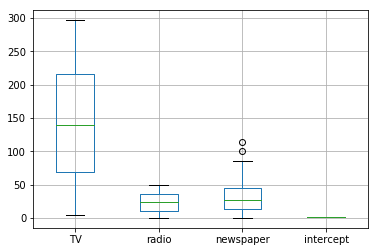

In [136]:
train=X.sample(frac=.8,random_state=99)
Y_tr = Y.sample(frac=.8,random_state=99)
test=X.drop(train.index)
Y_te=Y.drop(Y_tr.index)
train.boxplot()


**[5 points]** d) Train model on training data, and make predictions on testing data, using our solution from class

$$ \beta = (X^TX)^{-1}X^Ty.$$

It will be useful to use `np.linalg.inverse`. 

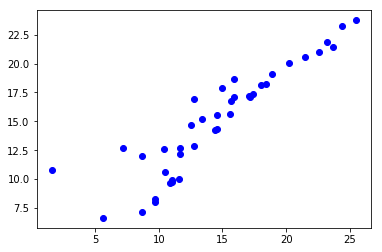

In [137]:
import numpy as np 
C=train.T.dot(train)
C_inv = np.linalg.inv(C)
A=C_inv.dot(train.T)
beta = A.dot(Y_tr)

import matplotlib.pyplot as plt
plt.plot(Y_te,test.dot(beta), 'bo')


**[5 points]** d) Train model on training data, and make predictions on testing data, using `sklearn.linear_model.LinearRegression`. Make sure your answer matches part d).

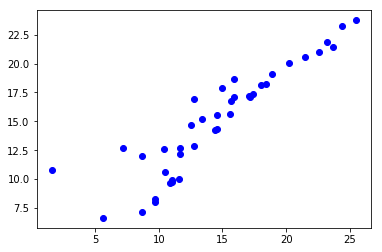

In [305]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(train,Y_tr)
Y_p = regr.predict(test)
plt.plot(Y_te,Y_p, 'bo')

**[5 points]** e) Evalute the R^2 on training data and testing data. Is this good? Bad? Why?

In [306]:
Y_d=Y_p-Y_te
Y_mean=sum(Y_te)/len(Y_te)
Y_d2 = Y_mean-Y_te
1-Y_d.dot(Y_d)/Y_d2.dot(Y_d2)

0.8155772169245927

In [307]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(Y_p,Y_te)

0.7467148230916636

**[5 points]** g) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a *good* model?

**Answer:** 
See above in d). The model looks to fit a y=x line mostly so mostly good yes. There some outliers though. 

**[5 points]** f) Interpreting the coefficients of your model (`clf.coef_1`), which form of advertising appears to have the largest impact on sales? Which has the least impact?

**Answer:** 
Seemingly the radio had the most and newspaper the least impact. 

array([ 0.0448832 ,  0.19249198, -0.00317219,  3.14368359])

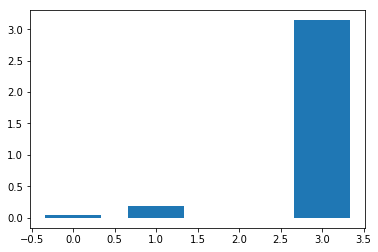

In [308]:
N = len(beta)
x = range(N)
plt.bar(x,beta, 2/3)
beta



**[10 points]** g) Plot the coefficients along with their confidence intervals, recalling that 

$$\beta \sim \mathcal{N}(\hat \beta, \hat \sigma^2(X^TX)^{-1}).$$

The variance of the coefficients are the diagonal elemements of the covariance matrix $\sigma^2(X^TX)^{-1}$, where $\hat \sigma$ is the estimated residuals. 

Ensure you obtain the same results for the variance of the coefficients as when you use:
```
import scipy, scipy.stats

result = sm.OLS( y, X ).fit()
result.summary()
```

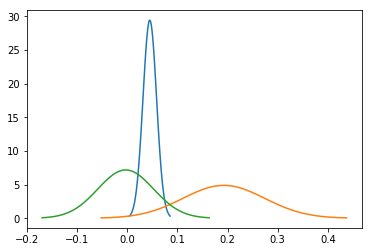

In [309]:
import scipy
import math
for i in range(3):
    mu= beta[i]
    resid = Y_d.dot(Y_d)
    var=resid*C_inv[i,i]
    sig = math.sqrt(var)
    x= np.linspace(mu-3*sig,mu+3*sig,100)
    plt.plot(x,scipy.stats.norm.pdf(x,mu,sig))
    


In [310]:
import scipy, scipy.stats , statsmodels.api as sm

result = sm.OLS( Y, X ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           1.58e-96
Time:                        17:42:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
intercept      2.9389      0.312      9.422      0.000       2.324       3.554
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**[10 points]** h) Repeat the steps above but **build a seperate model for each individual feature**, ie. `X = df[col]` where `col` is one of the variables TV, radio and newspaper. Based on this analysis, which feature now appears to have more of an influence on sales? Which has practically none? Provide an interpretation of this apparent contradiction. 

**Hint:** It may be useful to check the correlation matrix using `df.corr()` and to understand how the covariates relate to one another. 

In [312]:
train1 = train.copy()
train1['radio']=0
train1['newspaper']=0

train1

regr2 = linear_model.LinearRegression()
regr2.fit(train1,Y_tr)
regr2.coef_




array([0.04813412, 0.        , 0.        , 0.        ])

In [317]:
train2 = train.copy()
train2['TV']=0
train2['newspaper']=0

train2

regr3 = linear_model.LinearRegression()
regr3.fit(train2,Y_tr)
regr3.coef_





array([0.        , 0.21742305, 0.        , 0.        ])

In [320]:
train3 = train.copy()
train3['TV']=0
train3['radio']=0

train3


regr4 = linear_model.LinearRegression()
regr4.fit(train3,Y_tr)
regr4.coef_


array([0.00000000e+00, 1.38777878e-17, 6.47684067e-02, 0.00000000e+00])

**Answer:**

Looks like newspaper is still the strongest and the other two are practically irrelevant. If the coefficents are different is because two reasons. One we are ignoring how other ads changed as the sales changed. Two we are assuming the change in each ad type independently is the same as their joint change. 

**[10 points]** i) (synnergetic effects) Try plotting the data in three dimensions along with the hyperplane solution to see where the solution you have stops following the linear trend, and see if you can infer
a new variable which will help, which is a product of two of our current variables.  More precisely, our previous model has been:

$$ y = \beta_0 x_{0} +  \beta_0 x_{1} +  \beta_0 x_{2} + \epsilon.$$

See if you an introduce a new term $$ \beta_{ij} x_i x_j$$ for some j using your intuition from the previous problems.

What is your interpretation of this result?

** Hint: The code below can be adopted to make your 3d plot.**

Text(0.5, 0, 'sales')

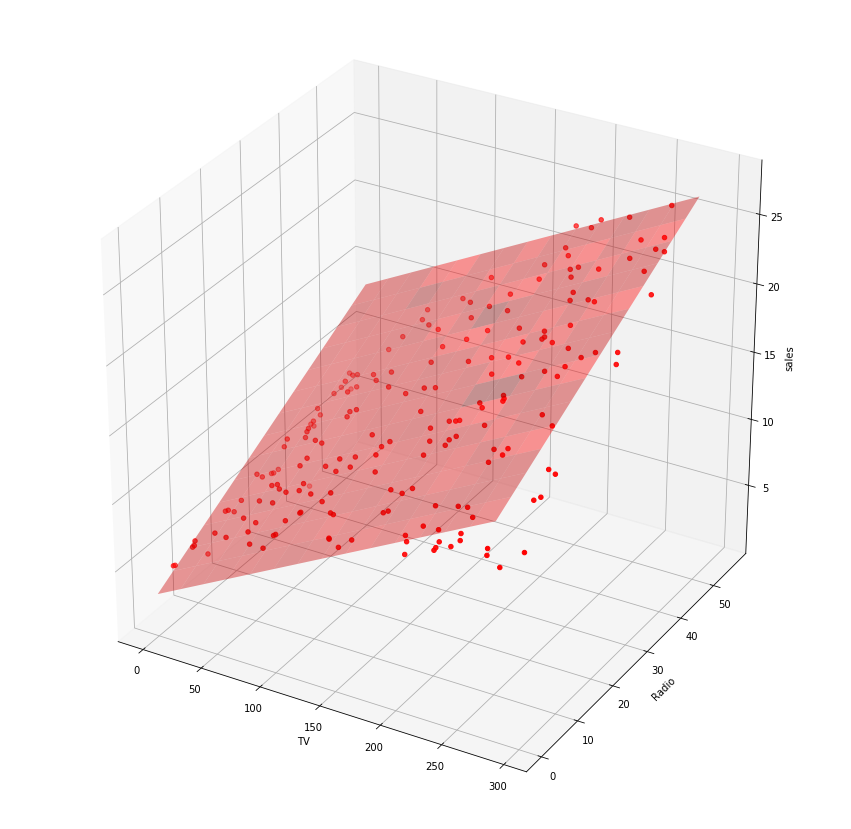

In [347]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 300, 20)
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

X = df[['TV','radio']]
y = df['sales']
new_x = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
regr_1 = LinearRegression(fit_intercept=True).fit(X,y)
predict_sales = regr_1.predict(new_x)
ax.plot_surface(x_surf, y_surf,
                predict_sales.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='red',
                alpha = 0.4)

ax.scatter(X['TV'], X['radio'], y, c='r', marker='o')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('sales')

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


ValueError: cannot reshape array of size 200 into shape (15,15)

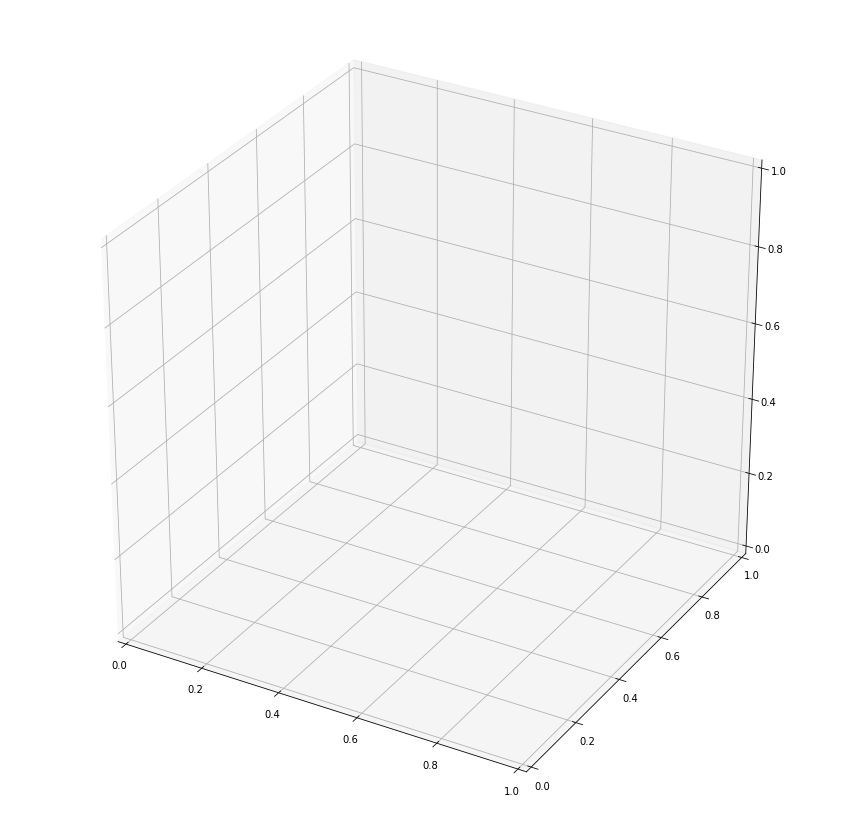

In [350]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 300, 20)
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

X = df[['TV','radio']]
new_var = X['TV']*X['radio']
X['prod']=new_var
y = df['sales']
new_x = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
regr_2 = LinearRegression().fit(X,y)
predict_sales = regr_2.predict(new_x)
ax.plot_surface(x_surf, y_surf,
                predict_sales.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='red',
                alpha = 0.4)

ax.scatter(X['TV'], X['radio'], y, c='r', marker='o')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('sales')


In [351]:
new_x

,TV,radio
0,0,0
1,20,0
2,40,0
3,60,0
4,80,0
5,100,0
6,120,0
7,140,0
8,160,0
9,180,0


**[5 points]** h) Does your mixed variable in i) imporve performance? Why?

**Answer:**

I assume the mixed variable helps. Due to that they operate as a unit and not independently. 

## Problem 4: Regularization and model selection

We had quite a hard time discovering the variables which had true predictive power in the previous section. What if we pnealized
the size of the coefficients in order to select the most predictive features?

Let $$ F_{\alpha}^p(\beta) : = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \beta \cdot \mathbf{x}^{(i)})^2 + \alpha \|\beta\|_{L^p}^p.$$

We call $F_{\alpha}^p$ to be the *Lasso* norm when $p=1$ and *Ridge* norm when $p=2$. 

** [5 points] ** a) First rescale you features to have mean zero and unit variance using


```from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
y_scaled = y - np.mean(y)```

In [413]:
from sklearn import preprocessing
Xtr_scaled = preprocessing.scale(train)
ytr_scaled = Y_tr - np.mean(Y_tr)
Xte_scaled = preprocessing.scale(test)
yte_scaled = Y_te - np.mean(Y_te)


** [5 points] ** a) Repeat the regression above, but using `sklearn`'s `Lasso()` method with $\alpha=0$ on the new scaled features. Notice you may obtain a warning. Can you explain what the warning about convergence of the gradient descent method may mean?

In [404]:
clf = linear_model.Lasso(alpha=0)
clf.fit(Xtr_scaled,ytr_scaled)

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\John\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

**Answer:**
Somehow the method used is a gradient descent, and with no penalization the coefficents may have no reason to be a specific value but could move or oscillate around.

** [10 points] ** b) Choose a range of $\alpha$ ranging from 0 to 1. Why does the $R^2$ score on test data seem to increase then decrease again?
Plot the $R^2$ on test data as you vary $\alpha$. 

**Note:** Because of the randomness, you may need to experiment a bit with replacing 1 by smaller or lower numbers. The goal is to find a concave region. Also, to create a collection of  uniformly distributed points from 0 to 1, you can use:

```import numpy as np
alphas = np.linspace(0,1,num_samples)
```

In [414]:
alphas = np.linspace(0,1,101)
scores = []

for i in alphas:
    
    clf = linear_model.Lasso(alpha=i)
    clf.fit(Xtr_scaled,ytr_scaled)
    scores.append(clf.score(Xte_scaled,yte_scaled))

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\John\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [415]:
scores

[0.8272708063611791,
 0.8271797201916243,
 0.8270587425637705,
 0.8269075355518242,
 0.8267260991557853,
 0.8264514672657273,
 0.8261368619821712,
 0.8258120555187489,
 0.8254766877018063,
 0.8251308835564471,
 0.8247746430826717,
 0.8244079662804796,
 0.8240308531498712,
 0.8236433036908465,
 0.8232453179034052,
 0.8228368957875476,
 0.8224180373432735,
 0.8219887425705829,
 0.821549011469476,
 0.8210988440399527,
 0.8206382402820128,
 0.8201672001956566,
 0.819685723780884,
 0.819193811037695,
 0.8186914619660896,
 0.8181786765660675,
 0.8176554548376291,
 0.8171217967807745,
 0.8165777023955033,
 0.8160231716818157,
 0.8154582046397116,
 0.8148828012691912,
 0.8142969615702543,
 0.8137006855429011,
 0.8130939731871314,
 0.8124768245029452,
 0.8118492394903426,
 0.8112112181493236,
 0.8105627604798882,
 0.8099038664820364,
 0.809234536155768,
 0.8085547695010834,
 0.8078645665179822,
 0.8071639272064648,
 0.8064528515665307,
 0.8057313395981804,
 0.8049993913014135,
 0.80425700667623

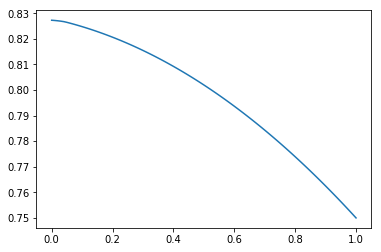

In [416]:
plt.plot(alphas,scores)

In [417]:
alphas[np.argmax(scores)]


0.0

**[10 points]** c) Choose the *best* $\alpha$ from part b) (you can use `alphas[np.argmax(scores)]`). What is your new score on test data? (it may not change much) What are the coefficients for this model and how do they compare as $\alpha$ ranges from close to $0$ to larger values?

In [419]:
scores[0]

0.8272708063611791

In [420]:
alphas = np.linspace(0,1,11)
coefs = []

for i in alphas:
    
    clf = linear_model.Lasso(alpha=i)
    clf.fit(Xtr_scaled,ytr_scaled)
    coefs.append(clf.coef_)

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\John\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [422]:
coefs

[array([ 3.81742147,  2.8274932 , -0.0689544 ,  0.        ]),
 array([ 3.71803257,  2.71603406, -0.        ,  0.        ]),
 array([3.62725366, 2.62525516, 0.        , 0.        ]),
 array([3.53647476, 2.53447627, 0.        , 0.        ]),
 array([3.44569585, 2.44369737, 0.        , 0.        ]),
 array([3.35491694, 2.35291848, 0.        , 0.        ]),
 array([3.26413804, 2.26213958, 0.        , 0.        ]),
 array([3.17335913, 2.17136069, 0.        , 0.        ]),
 array([3.08258022, 2.08058179, 0.        , 0.        ]),
 array([2.99180132, 1.98980289, 0.        , 0.        ]),
 array([2.90102241, 1.899024  , 0.        , 0.        ])]

**Answer:**
The coefficents seem to be disappearing (approaching zero) as alpha gets larger (moves away from zero). 

**[10 points]** d) Experiment with different values of $\alpha$ in part b) but now using `Ridge()`? How do the coefficients vary as you vary $\alpha$ in the `Ridge` method? 

How do you explain the difference between this observation and the solution in part c) based on the level sets of $L^p$ for $p=1$ and $p=2$.

In [429]:
alphas = np.linspace(0,10,101)
scores2 = []

for i in alphas:
    
    clfr = linear_model.Ridge(alpha=i)
    clfr.fit(Xtr_scaled,ytr_scaled)
    scores2.append(clfr.score(Xte_scaled,yte_scaled))

In [424]:
scores2

[0.8272708063611791,
 0.8272653309298265,
 0.8272598499423004,
 0.8272543634012177,
 0.827248871309194,
 0.8272433736688435,
 0.8272378704827792,
 0.8272323617536131,
 0.8272268474839556,
 0.8272213276764159,
 0.8272158023336021,
 0.8272102714581212,
 0.8272047350525784,
 0.8271991931195785,
 0.8271936456617242,
 0.8271880926816175,
 0.827182534181859,
 0.827176970165048,
 0.8271714006337828,
 0.8271658255906602,
 0.827160245038276,
 0.8271546589792242,
 0.8271490674160986,
 0.8271434703514906,
 0.8271378677879913,
 0.82713225972819,
 0.8271266461746749,
 0.8271210271300333,
 0.8271154025968508,
 0.8271097725777119,
 0.8271041370752,
 0.8270984960918975,
 0.8270928496303848,
 0.8270871976932417,
 0.8270815402830467,
 0.8270758774023771,
 0.8270702090538087,
 0.8270645352399162,
 0.8270588559632734,
 0.8270531712264522,
 0.8270474810320241,
 0.8270417853825586,
 0.8270360842806246,
 0.8270303777287892,
 0.8270246657296189,
 0.8270189482856785,
 0.8270132253995318,
 0.8270074970737414,
 

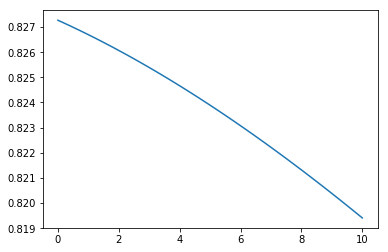

In [430]:
plt.plot(alphas,scores2)

**Answer:**

There seemes to be a similar phenomenon to the lasso but the decrease happens somewhat more linearly. 

The difference may be acconted for by realizing that L1 penalizes more heavily if want to have two features as compared to one. 

**[5 points]** Did we need to rescale in part a)? Why would our solution not make sense otherwise?

**Answer:**
Yes because if the terms were not comparable then some characteristics would be more unfairly penalized just due to their scaling of large measures.

## Problem 5:  Gradient Descent and the learning rate

**[10 points]** a) By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Running...
After 1 iterations b = 0.05847898064516393, m = 2.963022595383603, error = 5603.412309919729
Running...
After 10 iterations b = 0.0013799993242057454, m = -0.052731116954749524, error = 5960.491656681142
Running...
After 20 iterations b = 0.0027223788760460735, m = -0.10733897051081032, error = 6384.546867755712
Running...
After 30 iterations b = 0.00402582485218235, m = -0.16389041623220457, error = 6839.352575208397
Running...
After 40 iterations b = 0.0052889766396315985, m = -0.22245469128065265, error = 7327.138653151881
Running...
After 50 iterations b = 0.006510425148267399, m = -0.283103499255275, error = 7850.296675160142
Running...
After 60 iterations b = 0.007688711083919303, m = -0.3459110980546001, error = 8411.391639915297
Running...
After 70 iterations b = 0.008822323159955708, m = -0.4109543908684401, error = 9013.174547140108
Running...
After 80 iterations b = 0.009909696245156377, m = -0.47831302041118384, error = 9658.595885475132
Running...
After 90 itera

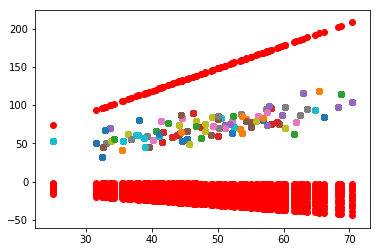

In [543]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    errors.append(totalError/float(len(points)))
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt(r"C:\Users\John\Documents\GitHub\APMAE4990-\data\data.csv", delimiter=",")
    learning_rate = 0.000402
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
#    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

errors = []
x = linspace(1,100,11).astype(int)
for i in x:
    run(i)

In [511]:
linspace(1,100,11).astype(int)

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

**Answer:**

It seems that if the "learning_rate," which are the step sizes we take, are:

1- too large then we do not converge to the right spot because we overshoot the target generally.

2- too small then we do not reach our target goal within 10 iterations. We could increase the number of iterations but that would take longer and the accuracy gained may not be signifigant.

b) **[10 points]** Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

In [531]:

E.append(errors)
errors

[6048.391912264637,
 12859.982778340214,
 29914.718353579286,
 69787.09292147655,
 163004.96788936853,
 380939.6206921166,
 890450.4056328615,
 2081638.847009961,
 4866525.72960626,
 11377330.129909338,
 26598980.31490006]

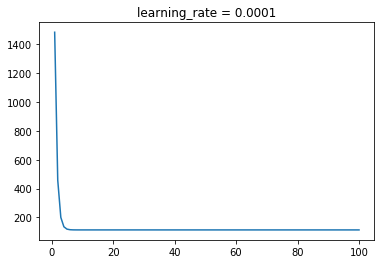

In [515]:

plt.plot(linspace(1,100,101).astype(int),errors)
plt.title("learning_rate = 0.0001")
plt.show()

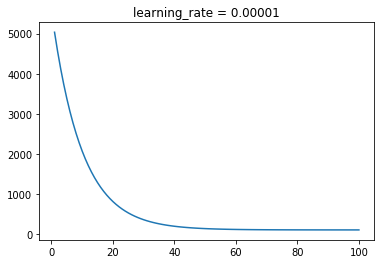

In [505]:
plt.plot(linspace(1,100,100).astype(int),errors)
plt.title("learning_rate = 0.00001")
plt.show()

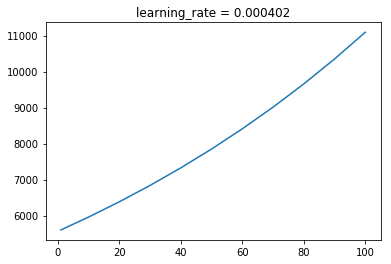

In [545]:

plt.plot(linspace(1,100,11).astype(int),errors)
plt.title("learning_rate = 0.000402")
plt.show()

# Problem 6 : Computing to Problem 2 via gradient descent. 

Let 

$$ \hat F(\beta) : = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \beta \cdot \mathbf{x}_i)^2 = \frac{1}{N}\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2, $$

where $(\mathbf{x}_i, y_i)$ are as in Problem 2. 


**[10 points]** a) Solve $\nabla \hat F(\beta) = 0$ for $\beta$ in terms of $\mathbf{X}$ and $\mathbf{y}$ and show that the solution is

$$ \beta = (\mathbf X^T\mathbf X)^{-1} \mathbf X^T \mathbf y. $$

*Hint:*
Use the product rule for inner products afer rewriting

$$\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2  = \langle \mathbf{y} - \mathbf{X} \beta, \; \mathbf{y} - \mathbf{X} \beta \rangle. $$


**Solution:**

$\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2  = (\mathbf{y} - \mathbf{X} \beta)^T(\mathbf{y} - \mathbf{X} \beta) = ( \mathbf{y}^T - \beta^T\mathbf{X}^T )(\mathbf{y} - \mathbf{X} \beta) $

$ = \mathbf{y}^T\mathbf{y} -\mathbf{y}^T\mathbf{X}\beta - \beta^T\mathbf{X}^T\mathbf{y} + \beta^T\mathbf{X}^T\mathbf{X}\beta$


$\frac{d}{d\beta}\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2  = \mathbf{0} - \mathbf{y}^T\mathbf{X} - \mathbf{y}^T\mathbf{X} + 2\beta^T\mathbf{X}^T\mathbf{X} = \mathbf{0} $ (for best fit $\beta$)



$\mathbf{y}^T\mathbf{X} = \beta^T\mathbf{X}^T\mathbf{X}$

$\mathbf{X}^T\mathbf{y} = \mathbf{X}^T\mathbf{X}\beta$

$ (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} = \beta $

**[5 points]** b)  What assumption did you have to make to solve for $\beta$ in in part a)? 

**Answer:**
I assumed:

That $\mathbf{X}$ & $\mathbf{y}$  were not dependent on $\beta$. 

That $\mathbf{X}^T\mathbf{X}$ has an inverse, namley that $\mathbf{X}$ is non degenerate. 

**[10 points]** c) Let $\beta_0 = (0, 0, 0)$ and $\nu =0.01$. Using your computation of $\nabla F(\beta)$ from a), write a function in Python which iterates

$$\beta_t = \beta_{t-1} - \nu \nabla \hat F(\beta_{t-1})$$ from $t=0,...,T$ for the original, unscaled variables $X,y$.  Are you having trouble with convergence? If so, consider more iterations and a much smaller learning rate. Why do you think we had to do this in this case? 

$\nabla \hat F(\beta) = \frac{1}{N}(2\beta^T\mathbf{X}^T\mathbf{X}-2\mathbf{y}^T\mathbf{X}) = \frac{2}{N}(\beta^T\mathbf{X}^T-\mathbf{y}^T)\mathbf{X} = \frac{2}{N}(\mathbf{X}\beta-\mathbf{y})^T\mathbf{X}$

In [147]:
y = df['sales']
X = df[['TV','radio','newspaper']]
N = df.shape[0]
beta_0 = [1,1,1]
coef = []
def grad(X, y, N, b):
    return (X.dot(b)-y).T.dot(X)*(2/N)

def beta_descent_iterate(X,y,N,b):
    v = .000001
    return b-v*grad(X,y,N,b)

def run(m,X,y,N,b):
    
    for i in range(m):
        beta = beta_descent_iterate(X,y,N,b)
        b= beta
    return beta

for j in range(1,20000, 1000):
    coef.append(run(j,X,y,N,beta_0))

#beta_1 = beta_descent_iterate(X,y,N,beta_0)
#beta_1
#beta_2 = beta_descent_iterate(X,y,N,beta_1)
#beta_2
#beta_3 = beta_descent_iterate(X,y,N,beta_2)

#beta_4 = beta_descent_iterate(X,y,N,beta_3)

#beta_descent_iterate(X,y,N,beta_4)


TV           0.053788
radio        0.222344
newspaper    0.016752
dtype: float64

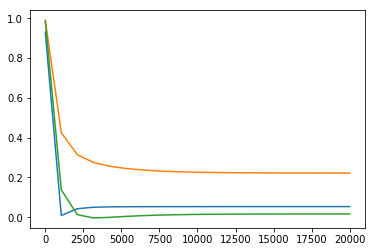

In [148]:
plt.plot(np.linspace(1,20000,20),coef)
coef[len(coef)-1]

TV           0.053796
radio        0.222106
newspaper    0.016884
dtype: float64

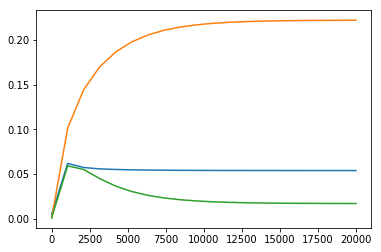

In [146]:
plt.plot(np.linspace(1,20000,20),coef)
coef[len(coef)-1]

**Answer:**
The solution could be jumped over if the learning rate was too aggressive.
The solutions seem to converge in a stable way. 

**[10 points]** d) Repeat part c) but for your scaled features. Do you notice that you can obtain convergence with a lower number
of iterations and higher learning rate? Explain why rescaling your features could have this impact. 

In [173]:
from sklearn import preprocessing
yp = df['sales']
Xp = df[['TV','radio','newspaper']]
N = df.shape[0]

X = preprocessing.scale(Xp)
y = yp - np.mean(yp)
beta_0 = [0,0,0]
coef = []

In [200]:
from sklearn import preprocessing
yp = df['sales']
Xp = df[['TV','radio','newspaper']]
N = df.shape[0]

X = preprocessing.scale(Xp)
y = yp - np.mean(yp)
beta_0 = [0,0,0]
coef = []

def grad(X, y, N, b):
    return (X.dot(b)-y).T.dot(X)*(2/N)

def beta_descent_iterate(X,y,N,b):
    v = .0005
    return b-v*grad(X,y,N,b)

def run(m,X,y,N,b):
    
    for i in range(m):
        beta = beta_descent_iterate(X,y,N,b)
        b= beta
    return beta

for j in range(1,20000, 1000):
    coef.append(run(j,X,y,N,beta_0))
    print(j)

1
1001
2001
3001
4001
5001
6001
7001
8001
9001
10001
11001
12001
13001
14001
15001
16001
17001
18001
19001


array([ 3.91925359,  2.79205615, -0.022532  ])

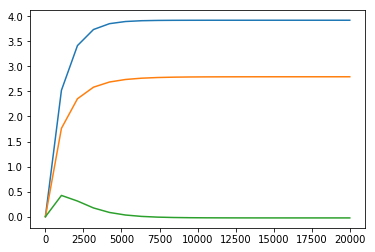

In [201]:
plt.plot(np.linspace(1,20000,20),coef)
coef[len(coef)-1]


**Answer:**
Looks like the learning rate can be greater here and it still converges, with the added benefit of less time. 

**[10 points]** e) Finally consider the Lasso regularized OLS. 

$$ \hat F_{\lambda}(\beta) : = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \beta \cdot \mathbf{x}_i)^2 = \|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2 + \lambda \|\beta\|_{L^1}, $$


Using the optimal $\lambda$ found in Problem 4, rewrite your gradient descent algorithm for this reguarlized norm. Ensure you used your scaled features. 

$\nabla \hat F(\beta) = \frac{2}{N}(\mathbf{X}\beta-\mathbf{y})^T\mathbf{X} + \lambda \begin{bmatrix}\frac{\beta_1^2}{\sqrt{\beta_1^2}}\\.\\.\\.\\ \frac{\beta_N^2}{\sqrt{\beta_N^2}}\end{bmatrix}$

In [218]:
from sklearn import preprocessing
yp = df['sales']
Xp = df[['TV','radio','newspaper']]
N = df.shape[0]

X = preprocessing.scale(Xp)
y = yp - np.mean(yp)
beta_0 = [0,0,0]
coef = []

def lasso_term(b):
    lam = .001
    for i in range(0,len(b)):
        if b[i] == 0:
            b[i] = 1
        else:
            b[i]= b[i]/abs(b[i])
    return [i*lam for i in b]

def grad(X, y, N, b):
    return (X.dot(b)-y).T.dot(X)*(2/N)

def beta_descent_iterate(X,y,N,b):
    v = .0005
    return b-v*grad(X,y,N,b) + lasso_term(b)

def run(m,X,y,N,b):
    
    for i in range(m):
        beta = beta_descent_iterate(X,y,N,b)
        b= beta
    return beta

for j in range(1,20000, 1000):
    coef.append(run(j,X,y,N,beta_0))
    print(j)

1
1001
2001
3001
4001
5001
6001
7001
8001
9001
10001
11001
12001
13001
14001
15001
16001
17001
18001
19001


array([4.84117467, 3.49392284, 0.67670951])

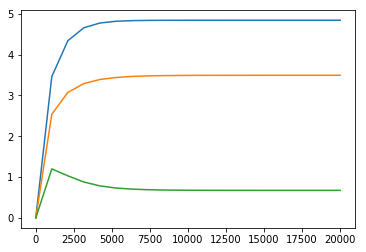

In [219]:
plt.plot(np.linspace(1,20000,20),coef)
coef[len(coef)-1]
